C:\Users\Checkout\AppData\Local\Temp\ipykernel_9588\3400933144.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('person_2020_update.csv')


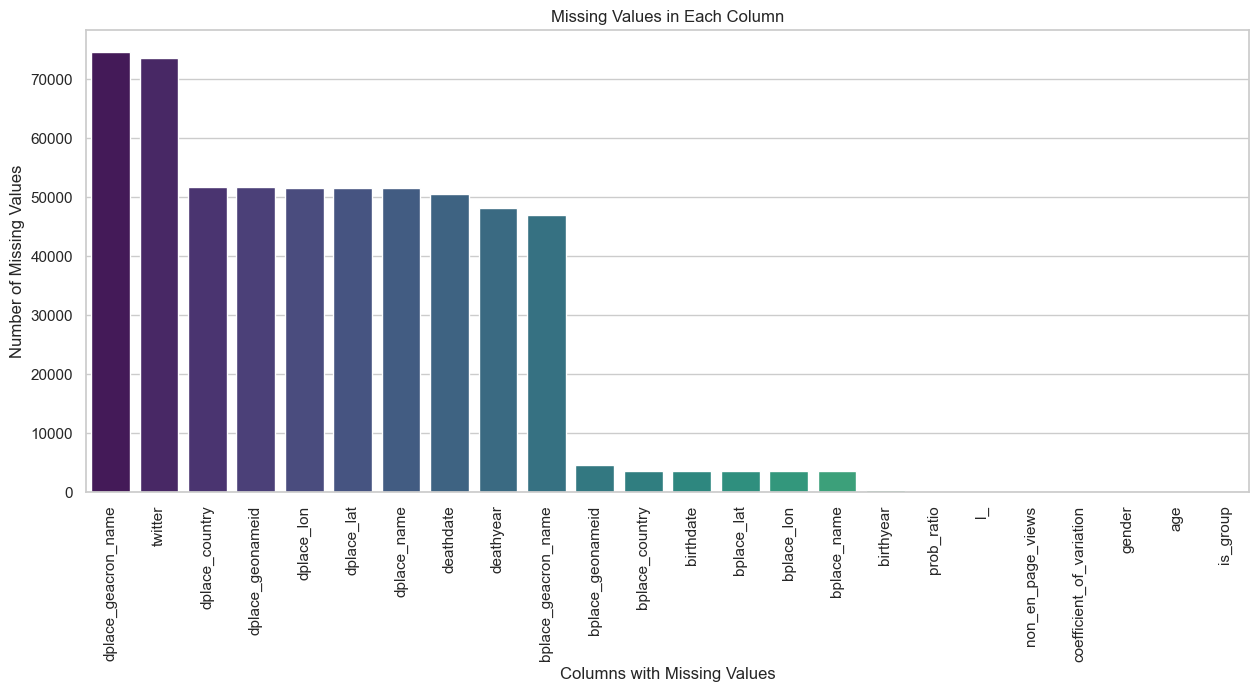

In [17]:
# Load the dataset
df = pd.read_csv('person_2020_update.csv')
# Calculating the number of missing values in each column
missing_values = df.isnull().sum()
# Sorting the columns by the number of missing values in descending order
missing_values_sorted = missing_values.sort_values(ascending=False)
# Filtering out columns that have no missing values
missing_values_sorted = missing_values_sorted[missing_values_sorted > 0]

plt.figure(figsize=(15, 6))
missing_values_plot = sns.barplot(x=missing_values_sorted.index, y=missing_values_sorted.values, palette="viridis")
missing_values_plot.set_title('Missing Values in Each Column')
missing_values_plot.set_xlabel('Columns with Missing Values')
missing_values_plot.set_ylabel('Number of Missing Values')
missing_values_plot.set_xticklabels(missing_values_sorted.index, rotation=90)
plt.show()

The bar graph highlights the prevalence of missing data across different fields within the dataset. Here's a summary of the findings:

- A noticeable number of entries are incomplete in columns related to birth and death locations, suggesting a lack of recorded information for many individuals' birthplaces and death details.
- The `deathyear` column also shows many missing entries, implying that for a significant group of individuals, the death year hasn't been captured or isn't relevant, which might be due to them being alive or due to outdated records.
- A lack of data in the `twitter` and `bplace_geacron_name` columns indicates that not every individual has an associated Twitter account or that the historical name of their birthplace isn't always noted.
- Essential attributes like `age`, `gender`, and `is_group` are largely complete, indicating reliable documentation for these details in the dataset.
- Missing figures in the `non_en_page_views` and `coefficient_of_variation` columns could potentially impact any analysis centered on online visibility metrics or their consistency.

In essence, the visualization points to significant informational voids, particularly in areas detailing personal histories and digital footprints. Addressing these missing elements is crucial for comprehensive analysis.

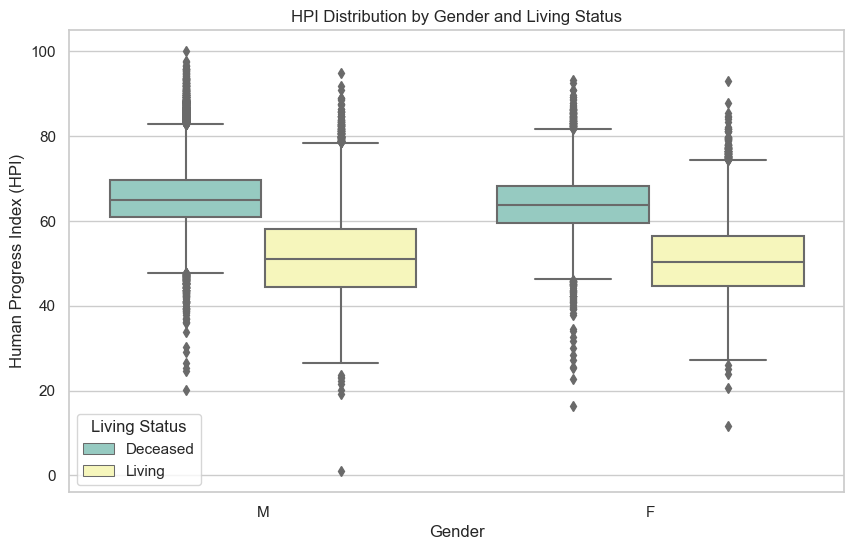

In [18]:
import seaborn as sns

# Map the 'alive' boolean to 'Living Status' for the boxplot legend
df['Living Status'] = df['alive'].map({True: 'Living', False: 'Deceased'})

# Boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='gender', y='hpi', hue='Living Status', data=df, palette="Set3")

# Set the title and labels
boxplot.set_title('HPI Distribution by Gender and Living Status')
boxplot.set_xlabel('Gender')
boxplot.set_ylabel('Human Progress Index (HPI)')

# Display the legend and plot
plt.legend(title='Living Status')
plt.show()


The boxplot graphically represents the Human Progress Index (HPI) distributions across genders, differentiated by living status, using the provided dataset. Here are the key observations:

1. Gender Distribution: The median HPI is quite similar for both genders. The female distribution is slightly more concentrated around the median as evidenced by a tighter interquartile range (IQR), suggesting less variability in HPI scores for females compared to males.

2. Impact of Living Status: The median HPI for individuals who are still living is lower than for those who are deceased across both genders. This might indicate that figures from the past, who have all passed away, generally have higher HPIs, likely because their legacy has had more time to establish.

3. Presence of Outliers: There's a significant presence of outliers in all categories, particularly among deceased males. These outliers are individuals whose HPI scores are exceptionally higher or lower than the majority.

4. Variability in Scores: Deceased individuals show a wider range of HPI scores, with deceased males exhibiting the most variability. This could reflect the diverse levels of historical recognition these individuals have received.

5. Historical Perspective: The elevated HPIs seen among the deceased could be indicative of a historical perspective bias, where historical figures, by virtue of their lasting impact and extensive documentation, tend to receive higher recognition.

In relation to the dataset, these observations imply that the HPI is influenced by not just the individual's contributions or societal impact, but also by the duration and documentation of their legacy, with historical personalities often having a more substantial influence on their HPI scores.

This analysis offers valuable comparative insights into the variation of HPI across gender lines and living status. It underscores the importance of considering how time and historical documentation can affect the HPI, particularly for those who have had longer to cement their legacies.

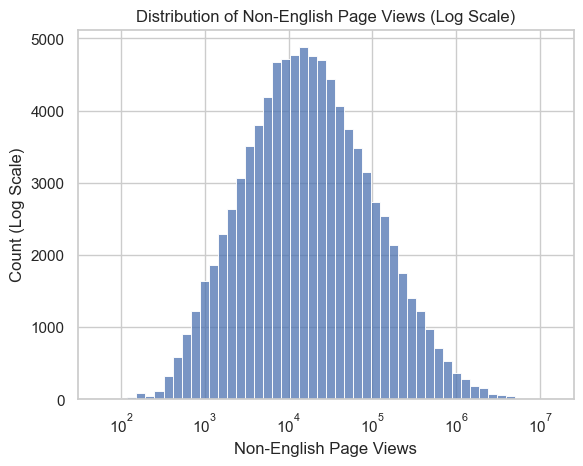

In [15]:
# 1. Distribution of page views (on a logarithmic scale due to large range)
# 2. Distribution of HPI (Human Progress Index)
# Distribution of page views on a log scale
sns.histplot(df['non_en_page_views'].dropna(), bins=50, kde=False, log_scale=True)
plt.title('Distribution of Non-English Page Views (Log Scale)')
plt.xlabel('Non-English Page Views')
plt.ylabel('Count (Log Scale)')
plt.show()


The histogram based on the dataset indicates the spread of non-English page views for the individuals profiled. Here's a connection between the visualization and the dataset:

1. Range of Visibility: The dataset spans a wide array of personalities, which is echoed in the diverse number of page views. Most individuals have relatively few non-English page views, as shown by the dense clustering at the lower end of the histogram.

2. Global Recognition: A handful of individuals stand out with exceptionally high page views. This likely points to their widespread recognition or influence across non-English speaking regions.

3. Distribution Characteristics: The distribution's skew to the right suggests that a small fraction of the dataset's individuals have a disproportionate impact on the higher end of the page view spectrum.

4. Noteworthy Outliers: The far-right outliers could be individuals of significant historical importance or current global fame, who naturally attract more international page views.

5. Insights from the Dataset: The dataset's rich information on individuals' lives and achievements is mirrored in the page views data. Non-English page views serve as a proxy for international interest and can highlight the global footprint of these individuals.

In essence, the non-English page view distribution provides insight into the international recognition of the individuals in the dataset. Most have limited international exposure, with a select few reaching high levels of global prominence.

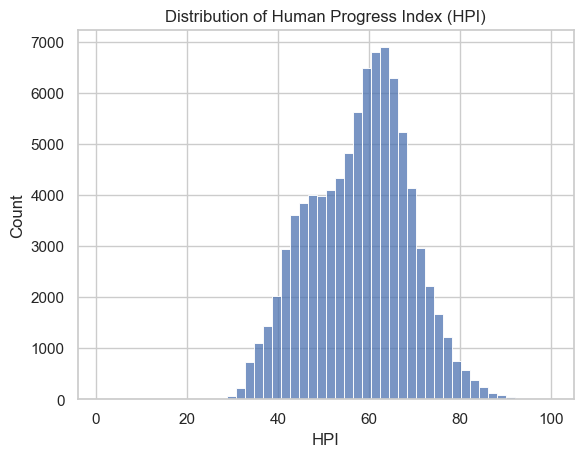

In [8]:
# Distribution of HPI
sns.histplot(df['hpi'].dropna(), bins=50, kde=False)
plt.title('Distribution of Human Progress Index (HPI)')
plt.xlabel('HPI')
plt.ylabel('Count')
plt.show()

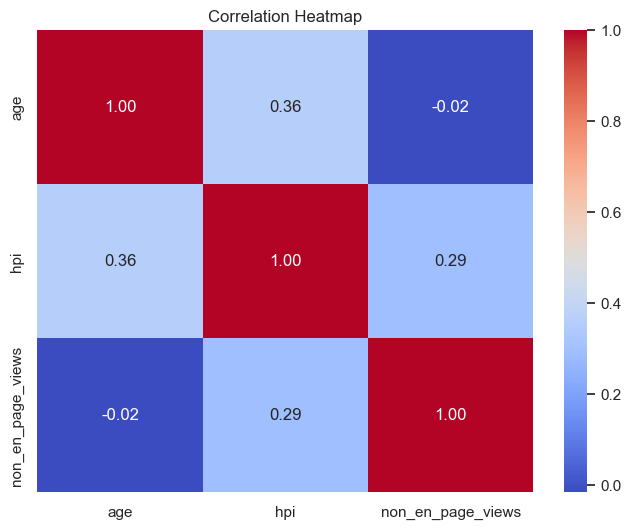

In [19]:
# considering age, hpi (Human Progress Index), and non_en_page_views for this heatmap
selected_columns = df[['age', 'hpi', 'non_en_page_views']]
correlation_matrix = selected_columns.corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
heatmap.set_title('Correlation Heatmap')
plt.show()

The heatmap provides an analysis of the relationships among age, Human Progress Index (HPI), and non-English page views within the dataset. Here's a summarized interpretation:

1. Link Between Age and HPI: There is a moderately positive correlation (0.36) between an individual's age and their HPI. This could indicate that individuals tend to achieve a higher HPI as they age, possibly due to accumulating notable works, recognition, or lifetime achievements.

2. Age Versus Non-English Page Views: A negligible negative correlation (-0.02) exists between age and non-English page views, suggesting no significant direct link between how old an individual is and the volume of non-English page views they attract.

3. HPI's Relationship with Non-English Page Views: A slight positive correlation (0.29) is observed between HPI and non-English page views, hinting that those with higher HPI scores may also enjoy a modestly increased presence in non-English online viewership, which could signal a broader international influence or recognition.

The heatmap serves as an efficient method to discern the magnitude and direction of variable interconnections. The findings indicate that age has some bearing on HPI, but its influence on non-English online presence is minimal. Conversely, the HPI's association with non-English page views, though not strong, could be attributed to factors like the extent of a person's impact or their global notoriety. The low correlation between non-English page views and both age and HPI suggests that other elements, possibly outside the dataset, may play a more significant role in affecting an individual's online popularity across different languages.

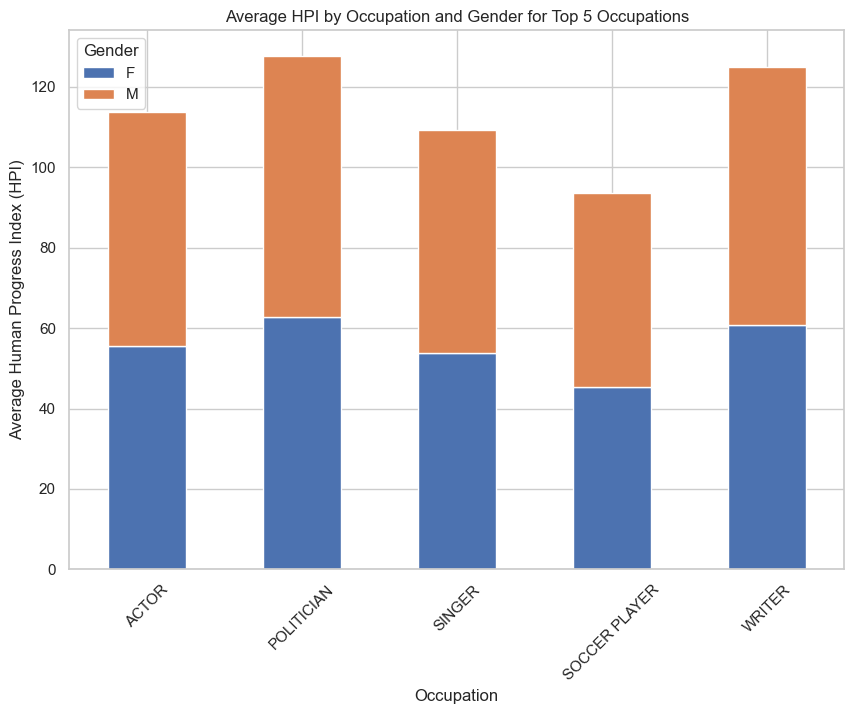

In [12]:
# To create a stacked bar plot, we need a categorical variable and a numerical variable.
# Let's use 'occupation' as the categorical variable and 'hpi' as the numerical one.
# The average HPI for the top 5 occupations by count and stack them by gender.
# Group the data by 'occupation' and 'gender', and then get the average 'hpi'
occupation_gender_hpi = df.groupby(['occupation', 'gender'])['hpi'].mean().reset_index()

# Find the top 5 occupations by count
top_occupations = df['occupation'].value_counts().head(5).index

# Filter the data to include only the top 5 occupations
top_occupation_gender_hpi = occupation_gender_hpi[occupation_gender_hpi['occupation'].isin(top_occupations)]

# Pivot the data to get a matrix form suitable for a stacked bar plot
pivot_df = top_occupation_gender_hpi.pivot(index='occupation', columns='gender', values='hpi').fillna(0)

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Average HPI by Occupation and Gender for Top 5 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Average Human Progress Index (HPI)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


The stacked bar chart demonstrates the mean Human Progress Index (HPI) across five prominent occupations, segmented by gender, according to the dataset. Here's an analysis of the chart:

1. Gender Distribution: Each occupation is broken down into segments that show the average HPI for men and women. The representation is mixed, with men generally showing a higher average HPI in these roles.

2. HPI by Profession: Actors and writers stand out with elevated average HPIs, suggesting that these careers might be more historically or socially influential, as per the data collected.

3. Gender Comparison: When comparing genders within each occupation, it is evident that men have a generally higher HPI, possibly reflecting historical biases or greater societal recognition of men's roles.

4. Cultural and Historical Context: The variation in HPI between genders across different occupations could be indicative of long-standing societal norms and the ways in which historical achievements have been recorded, often amplifying men's contributions in these fields.

The chart provides a basis for more in-depth investigations into the gender-based differences in HPI and how societal roles and historical recognition are portrayed in the dataset.

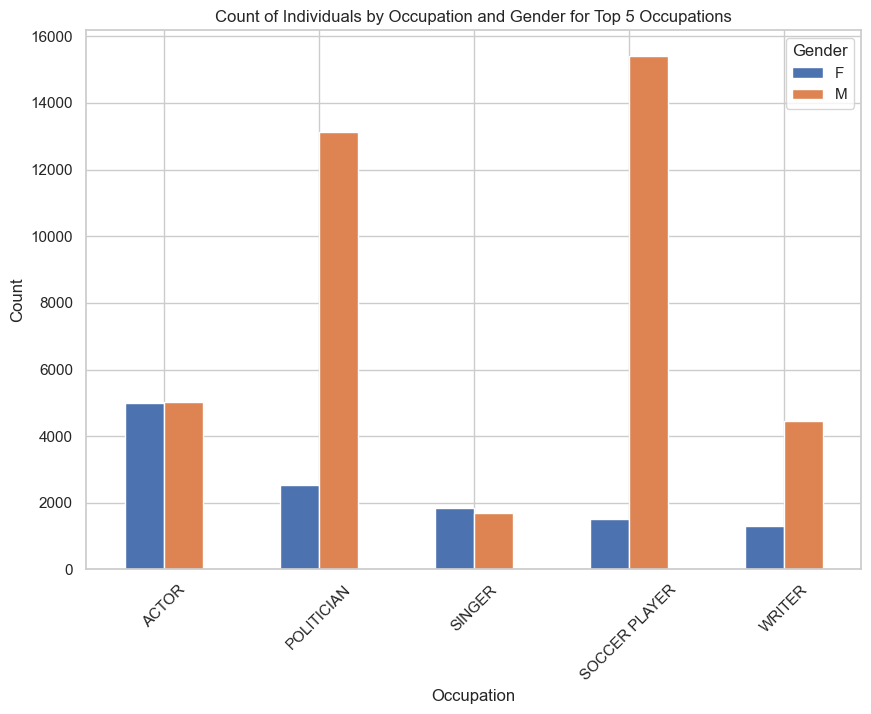

In [13]:
# To create a side by side bar plot, we'll use 'occupation' as the categorical variable and create bars for 'gender' side by side.
# We will show the count of individuals in the top 5 occupations by count, displayed side by side by gender.
# Find the top 5 occupations by count
top_occupations = df['occupation'].value_counts().head(5).index

# Filter the data to include only the top 5 occupations
top_occupations_data = df[df['occupation'].isin(top_occupations)]

# Create a crosstab of occupation count by gender
occupation_gender_count = pd.crosstab(top_occupations_data['occupation'], top_occupations_data['gender'])

# Plot the side by side bar chart
occupation_gender_count.plot(kind='bar', figsize=(10, 7), rot=45)
plt.title('Count of Individuals by Occupation and Gender for Top 5 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


The side-by-side bar chart displays the number of people across the five most common occupations in the dataset, categorized by gender. Here's a breakdown of the observations:

- Prevalence of Males: Across all the leading occupations featured in the dataset, male counts exceed female counts, highlighting a gender skew in the dataset's documented professions.
- Occupational Presence: Occupations such as 'Politician' and 'Singer' are highly populated, with 'Politician' having the largest gender gap.
- Balanced Representation: Among the occupations, 'Actor' has a more balanced gender ratio, yet it still displays a tendency towards a higher number of males.

This graphical comparison points to a potential need for a gender-focused analysis of the dataset and hints at possible historical or societal influences that have led to the predominance of males in these occupational categories. It serves as a basis for delving deeper into the root causes of gender imbalance observed in the professions documented.

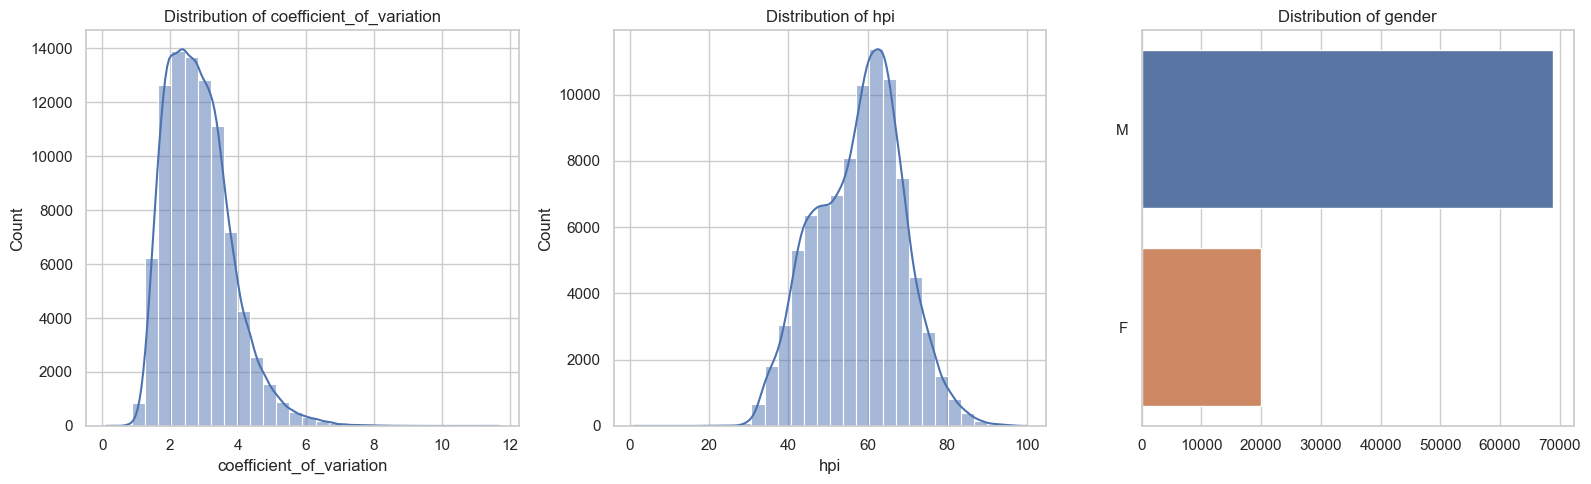

In [14]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Distribution of coefficient_of_variation
sns.histplot(df['coefficient_of_variation'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of coefficient_of_variation')

# Distribution of hpi
sns.histplot(df['hpi'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of hpi')

# Distribution of gender
gender_counts = df['gender'].value_counts()
sns.barplot(x=gender_counts.values, y=gender_counts.index, ax=axes[2])
axes[2].set_title('Distribution of gender')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

1. Coefficient of Variation Distribution: This histogram illustrates that the coefficient of variation generally clusters at lower figures, peaking at approximately 2.5. This pattern suggests that page view variability among most of the individuals in the dataset does not exhibit wide disparities, indicating more uniformity rather than erratic variations.

2. HPI Distribution: The graph of the Human Progress Index shows a generally normal distribution with a slight lean towards higher values. The bulk of individuals have HPI values in the moderate range of 50-60, implying a standard level of historical recognition. Nonetheless, a select few have significantly higher HPIs, pointing to a notable historical presence.

3. Gender Distribution: The bar graph displays a pronounced gender gap within the data, with male individuals markedly outnumbering females. This could be indicative of historical and societal tendencies to highlight male achievements over female ones, particularly in historical narratives and records.

In relation to the dataset, these visualizations collectively furnish insights into the distribution of page view consistency, historical prominence as gauged by HPI, and the distribution of gender across the documented individuals. These insights suggest areas for subsequent detailed exploration, such as the factors influencing page view consistency or the historical reasons for the observed gender disparity.